#### NAMING CONVENTION FOR VECTORS, MEATRICES, TENSORS ETC.  

x -> scaler  
xx -> collection of scalars

X -> vector  (1 is silent)  
X2 -> matrix  
X3 -> tensors of higher dimensions    

XX -> collection of vectors (each row is a datapoint)  (1 is silent)  
like a list of vectors  
its a matrix only but a different perspective  

X2X2 -> collection of matrices  
like a list of matrices

indexing 2x2 -> first index is rows

or MAKE THE NAMES EXPLICIT  
like a_vec, b_mat,..

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset in sklearn

In [2]:
#dataset availabe in sklearn package
breast_cancer = sklearn.datasets.load_breast_cancer() #real world dataset
# sklearn object

#classification problem - malignant or benign

In [3]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
XX = breast_cancer.data #each row - features(feature vector) (like input)
Y = breast_cancer.target # (like output)

In [5]:
breast_cancer.feature_names 
#all sklearn datasets have this attribute - feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#deal as a pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

data['class'] = breast_cancer.target  #add a column with y. name = 'class'

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Inspecting class balance, etc.

In [8]:
data['class'].value_counts() #count of each values
# count in classes => count of each class

#here, more samples with cancer than without.

1    357
0    212
Name: class, dtype: int64

In [9]:
breast_cancer.target_names #like class names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.groupby('class').mean() #mean across all rows of values of 'class col'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train Test split

In [11]:
#split data for training, testing.
#sklearn - many stuff for ML
from sklearn.model_selection import train_test_split

In [12]:
XX = data.drop('class', axis=1) #drop and return 
#axis=1 for column
Y = data['class']
#now XX, Y as dataframes.. for some convenient stuff.

In [13]:
#split
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y)
#80% to train, rest to test

# returns dataframe, series
# returns the same type as what was passed as input

In [14]:
XX_train.shape

(426, 30)

In [15]:
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1)
#specify fraction of test.

In [17]:
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1, stratify=Y)
#keep the same ratio of different Y-values in test, train 

#### step to use for train-test split:

In [18]:
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1, stratify=Y,random_state=1)
#specifying seed for random. (some constant speed)

#makes the splitting same all the time - important to get repeatable results.

#reproducable results - same model should give the same results all the time we run it.. for it same train, test.
#else each time we run split - it will give a different split.

### Main steps:

In [23]:
# breast_cancer = sklearn.datasets.load_breast_cancer() #real world dataset

# # XX = breast_cancer.data
# # Y = breast_cancer.target

# data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# data['class'] = breast_cancer.target
# # data is the full data dataframe

# XX = data.drop('class', axis=1)
# Y = data['class']
# # dataframe. more convenient

# XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1, stratify=Y,random_state=1)
# # returns same type as what was passed as input

### Plotting

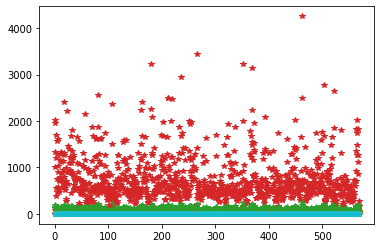

In [20]:
plt.plot(XX_train,'*') #each feature - a color
plt.show()

# XX_train is a 2D np array
# XX_train[i] -> a datapoint(row)
# plot each datapoint (one color for one datapoint) 
# but color overlap 

#plotting table.. -ish.. 

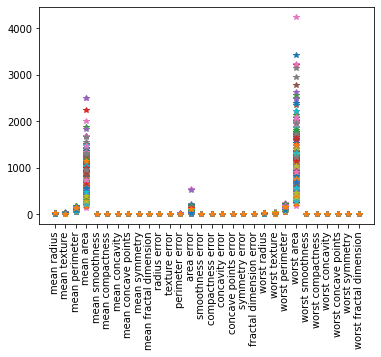

In [21]:
plt.plot(XX_train.T,'*')
# now XX_train.T[i] -> a column (one feature values across all datapoints)
# plot each feature values
# one color for each feature

plt.xticks(rotation='vertical') #for the x labels to come vertically to not overlap
plt.show()

#gives idea of range of values of each feature.

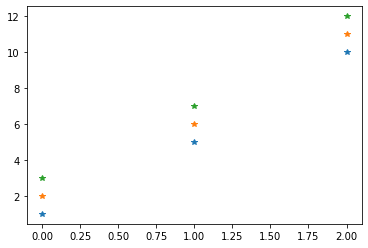

In [24]:
#eg
plt.plot([[1,2,3],[5,6,7],[10,11,12]],"*")
plt.show()

# plot each list
# one color for one list